In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import tensorflow
from tensorflow import keras
from keras.layers import Dense

In [3]:
data = pd.read_excel("National_Accidents_Australia.xlsx")

In [4]:
data.shape

(117919, 13)

In [5]:
label_encoder = LabelEncoder()
data['Month'] = label_encoder.fit_transform(data['Month'])
data['ABS remoteness area'] = label_encoder.fit_transform(data['ABS remoteness area'])
data['Cause of injury'] = label_encoder.fit_transform(data['Cause of injury'])
data['Age group'] = label_encoder.fit_transform(data['Age group'])
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Road user'] = label_encoder.fit_transform(data['Road user'])
data['Counterparty'] = label_encoder.fit_transform(data['Counterparty'])


In [6]:
data['Died_cases'].fillna(0, inplace=True)

data['Died_bed_days'].fillna(0, inplace=True)

data.dropna(subset=['Count of cases'], inplace=True)


data.head()

,Calendar year,Month,ABS remoteness area,Cause of injury,Age group,Sex,Road user,Counterparty,Count of cases,Bed days,Died_cases,Died_bed_days,Hospitalisations
0,2011,0,0,0,0,0,8,5,765.0,1007,0.0,0.0,765
1,2011,0,0,0,0,1,8,5,1010.0,1694,0.0,0.0,1010
2,2011,0,0,0,1,0,8,5,859.0,1597,0.0,0.0,859
3,2011,0,0,0,1,1,8,5,2231.0,3878,2.0,3.0,2229
4,2011,0,0,0,2,0,8,5,1098.0,2347,1.0,14.0,1097


In [7]:
data['Bed_days_category'] = np.where(data['Bed days'] >= 30, 1, 0)
data['Bed_days_category'].value_counts()

0    74918
1    38064
Name: Bed_days_category, dtype: int64

**Learn With Perceptron CLASSIFICATION Normaly  :**

In [8]:
X = data[['ABS remoteness area','Age group','Sex','Road user','Cause of injury']]
y = data['Bed_days_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=5))
model.add(Dense(units=1, activation='sigmoid'))


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
2472/2472 [==============================] - 8s 3ms/step - loss: 0.5065 - accuracy: 0.7743 - val_loss: 0.4869 - val_accuracy: 0.7828
Epoch 2/20
2472/2472 [==============================] - 6s 2ms/step - loss: 0.4755 - accuracy: 0.7862 - val_loss: 0.4681 - val_accuracy: 0.7912
Epoch 3/20
2472/2472 [==============================] - 7s 3ms/step - loss: 0.4643 - accuracy: 0.7924 - val_loss: 0.4594 - val_accuracy: 0.7939
Epoch 4/20
 206/2472 [=>............................] - ETA: 3s - loss: 0.4634 - accuracy: 0.7954

KeyboardInterrupt: 

In [ ]:
predictions = model.predict(X_test)

binary_predictions = (predictions > 0.5).astype(int)

precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
acc = accuracy_score(y_test, binary_predictions)


print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(acc)

1060/1060 [==============================] - 2s 1ms/step
Precision: 0.8767050721758708
Recall: 0.5775102503707581
F1 Score: 0.6963290207215735
0.829650390913114


**Learn with CNN** CLASSIFICATION Normaly **bold text**

In [11]:
import torch

from torch import nn
from torch.utils.data import Dataset, DataLoader

In [12]:
def get_device():
    return torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

device = get_device()
device

device(type='cpu')

In [13]:
class CNNModel(nn.Module):
    def __init__(self, n_features, num_classes):
        super(CNNModel, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(64 * (n_features - 3 + 1), 64)
        self.fc2 = nn.Linear(64, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.conv1(x)
        x = self.relu(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)

        return x

In [14]:
class SimpleData(Dataset):
    def __init__(self, x, y, transform=None, target_transform=None) -> None:
        self.x = x
        self.y=y
        self.transform=transform
        self.target_transform = target_transform


    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        if self.transform:
            self.x = self.transform(self.x)
        if self.target_transform:
            self.y = self.target_transform(self.y)

        return self.x[index], self.y[index]

In [ ]:
x = data[['ABS remoteness area','Age group','Sex','Road user','Cause of injury']].values
y = data['Bed_days_category'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [ ]:
x_train = torch.Tensor(x_train)
y_train = torch.Tensor(y_train)

x_test = torch.Tensor(x_test)
y_test = torch.Tensor(y_test)

train_data = SimpleData(x_train, y_train)
test_data = SimpleData(x_test, y_test)

train_dl = DataLoader(train_data, batch_size=32, shuffle=True)
test_dl = DataLoader(test_data, batch_size=32, shuffle=True)

In [ ]:
n_features = x_train.shape[1]
num_classes = 2

model = CNNModel(n_features, num_classes)
model

CNNModel(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,))
  (relu): ReLU()
  (fc1): Linear(in_features=192, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
epochs = 10

model.train()
for epoch in range(epochs):
    losses = list()
    for input_data, labels in train_dl:
        optimizer.zero_grad()

        input_data = input_data.to(device).float()
        labels = labels.to(device)

        output = model(input_data)
        labels = labels.type(torch.LongTensor)
        loss = criterion(output, labels)
        loss.backward()
        losses.append(loss.item())
        optimizer.step()

    print(f'Epoch {epoch + 1} | Loss {round(sum(losses) / len(losses), 4)}')

Epoch 1 | Loss 0.4548
Epoch 2 | Loss 0.3986
Epoch 3 | Loss 0.3815
Epoch 4 | Loss 0.3746
Epoch 5 | Loss 0.3704
Epoch 6 | Loss 0.3676
Epoch 7 | Loss 0.3656
Epoch 8 | Loss 0.3635
Epoch 9 | Loss 0.3622
Epoch 10 | Loss 0.3609


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

model.eval()
total_correct = 0
total_samples = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for test_data, test_labels in test_dl:
        test_outputs = model(test_data)
        _, predicted = torch.max(test_outputs, 1)
        total_correct += (predicted == test_labels).sum().item()
        total_samples += test_labels.size(0)
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(test_labels.cpu().numpy())

accuracy = total_correct / total_samples
print(f'Test Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(all_labels, all_predicted, average='binary')
recall = recall_score(all_labels, all_predicted, average='binary')
f1 = f1_score(all_labels, all_predicted, average='binary')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


Test Accuracy: 83.11%
Precision: 0.8899
Recall: 0.5713
F1-score: 0.6959


CLASSIFICATION WITH ROAD USERS 8.  perceptron
---> Not applicable



In [ ]:
filtered_data = data[data['Road user'] == 8]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']]
y = (filtered_data['Bed days'] > 30).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=3))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
688/688 [==============================] - 2s 2ms/step - loss: 0.2327 - accuracy: 0.9011 - val_loss: 0.1967 - val_accuracy: 0.9113
Epoch 2/20
688/688 [==============================] - 2s 2ms/step - loss: 0.1917 - accuracy: 0.9157 - val_loss: 0.1946 - val_accuracy: 0.9123
Epoch 3/20
688/688 [==============================] - 1s 2ms/step - loss: 0.1901 - accuracy: 0.9161 - val_loss: 0.1961 - val_accuracy: 0.9114
Epoch 4/20
688/688 [==============================] - 1s 2ms/step - loss: 0.1903 - accuracy: 0.9161 - val_loss: 0.1934 - val_accuracy: 0.9123
Epoch 5/20
688/688 [==============================] - 2s 3ms/step - loss: 0.1894 - accuracy: 0.9157 - val_loss: 0.1937 - val_accuracy: 0.9153
Epoch 6/20
688/688 [==============================] - 1s 2ms/step - loss: 0.1886 - accuracy: 0.9159 - val_loss: 0.1932 - val_accuracy: 0.9153
Epoch 7/20
688/688 [==============================] - 2s 3ms/step - loss: 0.1892 - accuracy: 0.9158 - val_loss: 0.1936 - val_accuracy: 0.9114
Epoch 

In [ ]:
predictions = model.predict(X_test)

binary_predictions = (predictions > 0.5).astype(int)

precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
acc = accuracy_score(y_test, binary_predictions)


print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(acc)

295/295 [==============================] - 0s 1ms/step
Precision: 0.9718924581005587
Recall: 0.8815518606492478
F1 Score: 0.9245204683218468
0.903564608529599


**bold text**
Learn with CNN 8---> Not applicable

In [ ]:
filtered_data = data[data['Road user'] == 8]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']].values
y = (filtered_data['Bed days'] > 30).astype(int).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)


In [ ]:
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

train_data = SimpleData(X_train, y_train)
test_data = SimpleData(X_test, y_test)

train_dl = DataLoader(train_data, batch_size=32, shuffle=True)
test_dl = DataLoader(test_data, batch_size=32, shuffle=True)

In [ ]:
n_features = X_train.shape[1]
num_classes = 2

model = CNNModel(n_features, num_classes)
model

CNNModel(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,))
  (relu): ReLU()
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
epochs = 10

model.train()
for epoch in range(epochs):
    losses = list()
    for input_data, labels in train_dl:
        optimizer.zero_grad()

        input_data = input_data.to(device).float()
        labels = labels.to(device)

        output = model(input_data)
        labels = labels.type(torch.LongTensor)
        loss = criterion(output, labels)
        loss.backward()
        losses.append(loss.item())
        optimizer.step()

    print(f'Epoch {epoch + 1} | Loss {round(sum(losses) / len(losses), 4)}')

Epoch 1 | Loss 0.2045
Epoch 2 | Loss 0.1915
Epoch 3 | Loss 0.1896
Epoch 4 | Loss 0.1885
Epoch 5 | Loss 0.1891
Epoch 6 | Loss 0.1893
Epoch 7 | Loss 0.1886
Epoch 8 | Loss 0.1878
Epoch 9 | Loss 0.1878
Epoch 10 | Loss 0.1887


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

model.eval()
total_correct = 0
total_samples = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for test_data, test_labels in test_dl:
        test_outputs = model(test_data)
        _, predicted = torch.max(test_outputs, 1)
        total_correct += (predicted == test_labels).sum().item()
        total_samples += test_labels.size(0)
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(test_labels.cpu().numpy())

accuracy = total_correct / total_samples
print(f'Test Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(all_labels, all_predicted, average='binary')
recall = recall_score(all_labels, all_predicted, average='binary')
f1 = f1_score(all_labels, all_predicted, average='binary')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


Test Accuracy: 91.45%
Precision: 0.9395
Recall: 0.9321
F1-score: 0.9358


perceptron
CLASSIFICATION WITH ROAD USERS 1---> Car driver

Epoch 1/20
362/362 [==============================] - 4s 8ms/step - loss: 0.4759 - accuracy: 0.8072 - val_loss: 0.3714 - val_accuracy: 0.8451
Epoch 2/20
362/362 [==============================] - 2s 6ms/step - loss: 0.3498 - accuracy: 0.8491 - val_loss: 0.3556 - val_accuracy: 0.8374
Epoch 3/20
362/362 [==============================] - 2s 5ms/step - loss: 0.3463 - accuracy: 0.8488 - val_loss: 0.3559 - val_accuracy: 0.8444
Epoch 4/20
362/362 [==============================] - 2s 5ms/step - loss: 0.3431 - accuracy: 0.8503 - val_loss: 0.3551 - val_accuracy: 0.8366
Epoch 5/20
362/362 [==============================] - 1s 3ms/step - loss: 0.3414 - accuracy: 0.8501 - val_loss: 0.3514 - val_accuracy: 0.8366
Epoch 6/20
362/362 [==============================] - 1s 4ms/step - loss: 0.3405 - accuracy: 0.8502 - val_loss: 0.3529 - val_accuracy: 0.8366
Epoch 7/20
362/362 [==============================] - 2s 5ms/step - loss: 0.3396 - accuracy: 0.8500 - val_loss: 0.3481 - val_accuracy: 0.8444
Epoch 

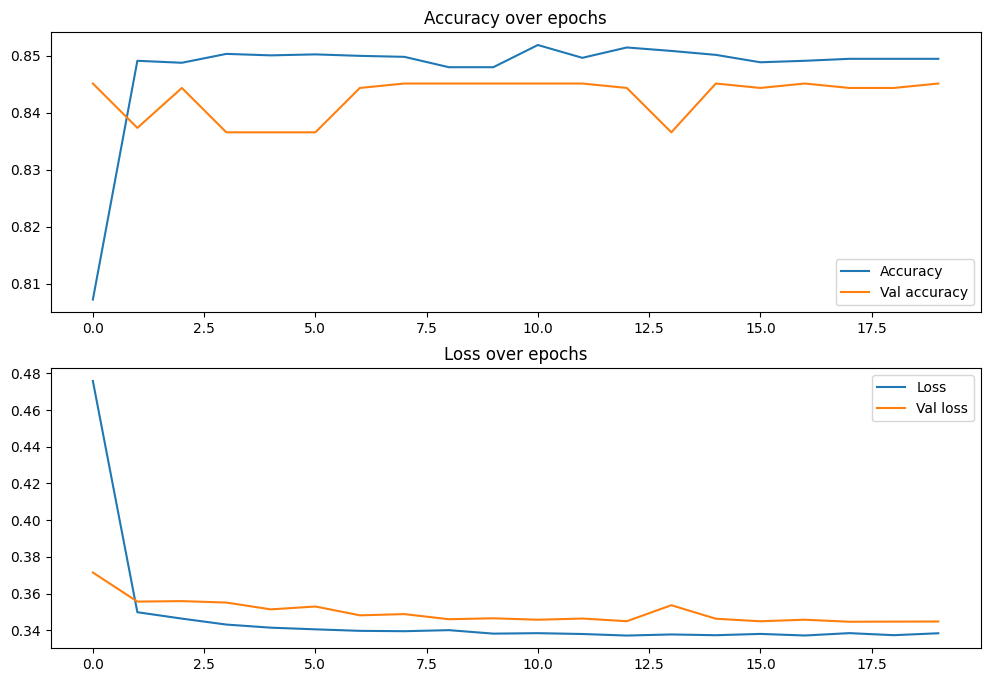

In [13]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

filtered_data = data[data['Road user'] == 1]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']]
y = (filtered_data['Bed days'] > 30).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=3))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

accuracy = history.history['accuracy']
loss = history.history['loss']

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend()
plt.title('Accuracy over epochs')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.title('Loss over epochs')

plt.show()

In [27]:
predictions = model.predict(X_test)

binary_predictions = (predictions > 0.5).astype(int)

precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
acc = accuracy_score(y_test, binary_predictions)



print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'accuray:{acc}')

101/101 [==============================] - 0s 1ms/step
Precision: 0.8595132743362832
Recall: 0.6993699369936993
F1 Score: 0.7712158808933002
accuray:0.8564310183743382


In [28]:
confusion_matrix(binary_predictions,y_test)

array([[1973,  334],
       [ 127,  777]])

CNN
CLASSIFICATION WITH ROAD USERS 1---> Car driver

In [104]:
filtered_data = data[data['Road user'] == 1]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']].values
y = (filtered_data['Bed days'] > 30).astype(int).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)


In [105]:
X_val = torch.Tensor(X_val)
y_val = torch.Tensor(y_val)

X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

val_data = SimpleData(X_val, y_val)
train_data = SimpleData(X_train, y_train)
test_data = SimpleData(X_test, y_test)

train_dl = DataLoader(train_data, batch_size=32, shuffle=True)
test_dl = DataLoader(test_data, batch_size=32, shuffle=True)
val_dl = DataLoader(val_data, batch_size=32, shuffle=True)


In [106]:
n_features = X_train.shape[1]
num_classes = 2

model = CNNModel(n_features, num_classes)

model

CNNModel(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,))
  (relu): ReLU()
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)

In [107]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

Epoch 1 | Loss 0.4916 | Acc 0.8307
Epoch 2 | Loss 0.4563 | Acc 0.8502
Epoch 3 | Loss 0.4575 | Acc 0.8477
Epoch 4 | Loss 0.4566 | Acc 0.8489
Epoch 5 | Loss 0.4576 | Acc 0.847
Epoch 6 | Loss 0.4553 | Acc 0.8509
Epoch 7 | Loss 0.4561 | Acc 0.8489
Epoch 8 | Loss 0.4549 | Acc 0.85
Epoch 9 | Loss 0.4538 | Acc 0.8494
Epoch 10 | Loss 0.4543 | Acc 0.8488
Epoch 11 | Loss 0.4535 | Acc 0.8502
Epoch 12 | Loss 0.4541 | Acc 0.851
Epoch 13 | Loss 0.4535 | Acc 0.85
Epoch 14 | Loss 0.4528 | Acc 0.8488
Epoch 15 | Loss 0.4533 | Acc 0.8502
Epoch 16 | Loss 0.4538 | Acc 0.8517
Epoch 17 | Loss 0.4526 | Acc 0.8512
Epoch 18 | Loss 0.4526 | Acc 0.8518
Epoch 19 | Loss 0.4545 | Acc 0.8502
Epoch 20 | Loss 0.453 | Acc 0.8521


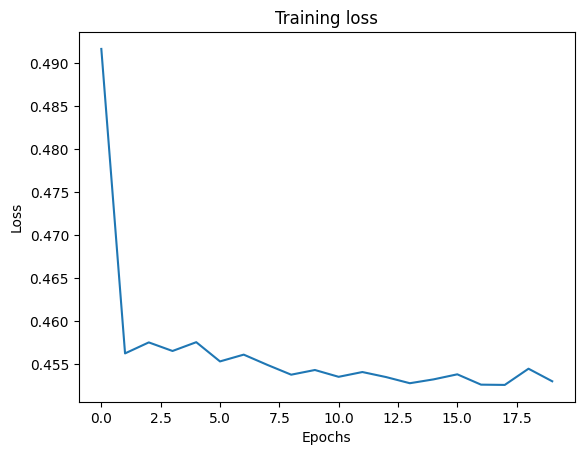

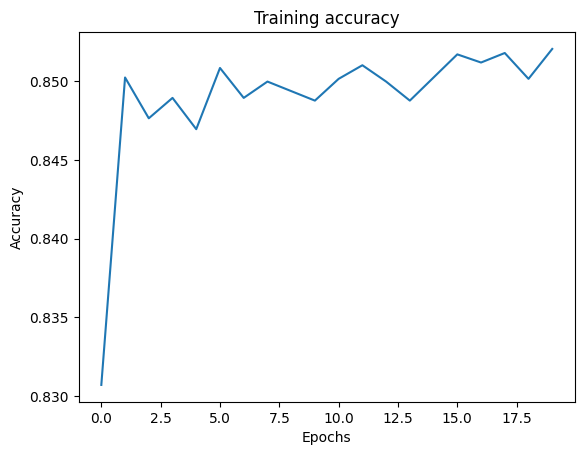

In [108]:
import matplotlib.pyplot as plt

train_losses = []
train_accs = []

model.train()
for epoch in range(20):
    epoch_loss = 0.0
    epoch_acc = 0.0
    for input_data, labels in train_dl:
        optimizer.zero_grad()

        input_data = input_data.to(device).float()
        labels = labels.to(device)

        output = model(input_data)
        labels = labels.type(torch.LongTensor)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        _, preds = torch.max(output, dim=1)
        epoch_acc += torch.sum(preds == labels).item()

    train_losses.append(epoch_loss / len(train_dl))
    train_accs.append(epoch_acc / len(train_dl.dataset))
    print(f'Epoch {epoch + 1} | Loss {round(epoch_loss / len(train_dl), 4)} | Acc {round(epoch_acc / len(train_dl.dataset), 4)}')

# Plot the loss data
plt.plot(train_losses)
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot the accuracy data
plt.plot(train_accs)
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [123]:
from sklearn.metrics import precision_score, recall_score, f1_score

model.eval()
total_correct = 0
total_samples = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for test_data, test_labels in test_dl:
        test_outputs = model(test_data)
        _, predicted = torch.max(test_outputs, 1)
        total_correct += (predicted == test_labels).sum().item()
        total_samples += test_labels.size(0)
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(test_labels.cpu().numpy())

accuracy = total_correct / total_samples
print(f'Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(all_labels, all_predicted, average='binary')
recall = recall_score(all_labels, all_predicted, average='binary')
f1 = f1_score(all_labels, all_predicted, average='binary')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(confusion_matrix(all_labels,all_predicted))

Accuracy: 82.95%
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
[[3702    0]
 [ 761    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


perceptron CLASSIFICATION WITH ROAD USERS 2---> Car passenger

Epoch 1/20
335/335 [==============================] - 1s 2ms/step - loss: 0.4645 - accuracy: 0.8597 - val_loss: 0.3529 - val_accuracy: 0.8706
Epoch 2/20
335/335 [==============================] - 1s 2ms/step - loss: 0.3361 - accuracy: 0.8711 - val_loss: 0.3422 - val_accuracy: 0.8672
Epoch 3/20
335/335 [==============================] - 1s 3ms/step - loss: 0.3326 - accuracy: 0.8705 - val_loss: 0.3431 - val_accuracy: 0.8697
Epoch 4/20
335/335 [==============================] - 1s 3ms/step - loss: 0.3316 - accuracy: 0.8721 - val_loss: 0.3407 - val_accuracy: 0.8664
Epoch 5/20
335/335 [==============================] - 1s 4ms/step - loss: 0.3316 - accuracy: 0.8728 - val_loss: 0.3400 - val_accuracy: 0.8664
Epoch 6/20
335/335 [==============================] - 2s 5ms/step - loss: 0.3297 - accuracy: 0.8727 - val_loss: 0.3388 - val_accuracy: 0.8664
Epoch 7/20
335/335 [==============================] - 1s 4ms/step - loss: 0.3299 - accuracy: 0.8722 - val_loss: 0.3474 - val_accuracy: 0.8639
Epoch 

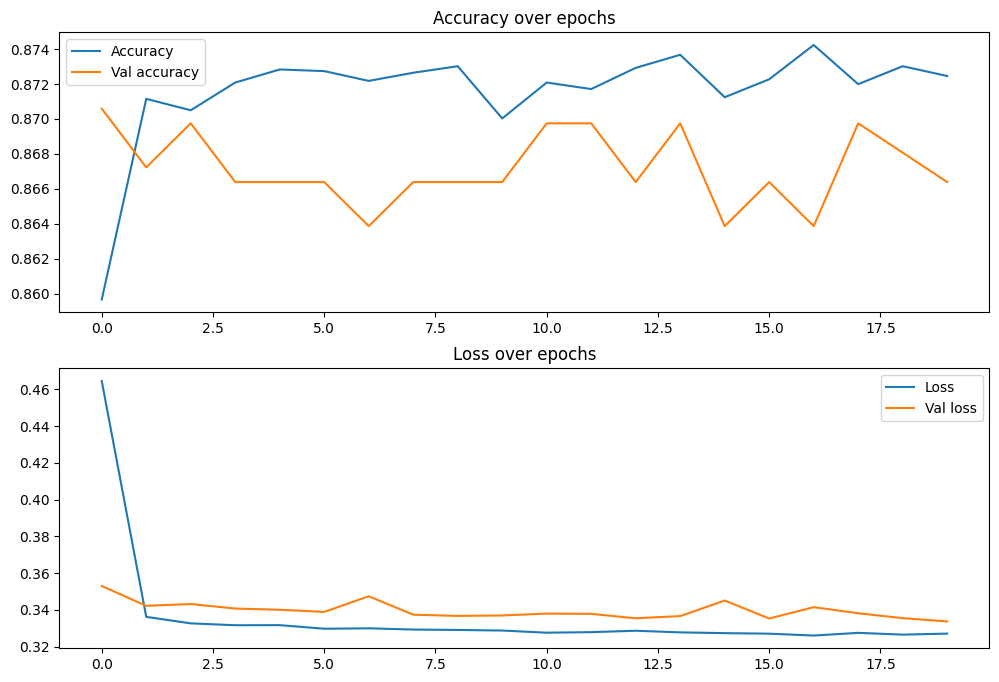

In [53]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

filtered_data = data[data['Road user'] == 2]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']]
y = (filtered_data['Bed days'] > 30).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=3))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

accuracy = history.history['accuracy']
loss = history.history['loss']

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend()
plt.title('Accuracy over epochs')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.title('Loss over epochs')

plt.show()

In [55]:
predictions = model.predict(X_test)

binary_predictions = (predictions > 0.5).astype(int)

precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
acc = accuracy_score(y_test, binary_predictions)


print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'accuracy: {acc}')


93/93 [==============================] - 0s 2ms/step
Precision: 0.7259615384615384
Recall: 0.2926356589147287
F1 Score: 0.41712707182320446
accuracy: 0.8581989247311828


CNN CLASSIFICATION WITH ROAD USERS 2---> Car passenger

In [110]:
filtered_data = data[data['Road user'] == 2]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']].values
y = (filtered_data['Bed days'] > 30).astype(int).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)


In [117]:
X_val = torch.Tensor(X_val)
y_val = torch.Tensor(y_val)

X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

val_data = SimpleData(X_val, y_val)
train_data = SimpleData(X_train, y_train)
test_data = SimpleData(X_test, y_test)

train_dl = DataLoader(train_data, batch_size=32, shuffle=True)
test_dl = DataLoader(test_data, batch_size=32, shuffle=True)
val_dl = DataLoader(val_data, batch_size=32, shuffle=True)


In [118]:
n_features = X_train.shape[1]
num_classes = 2

model = CNNModel(n_features, num_classes)
model

CNNModel(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,))
  (relu): ReLU()
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)

In [119]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

Epoch 1 | Loss 0.4865 | Acc 0.8362
Epoch 2 | Loss 0.4703 | Acc 0.8431
Epoch 3 | Loss 0.4702 | Acc 0.8431
Epoch 4 | Loss 0.4703 | Acc 0.8431
Epoch 5 | Loss 0.4702 | Acc 0.8431
Epoch 6 | Loss 0.4703 | Acc 0.8431
Epoch 7 | Loss 0.47 | Acc 0.8431
Epoch 8 | Loss 0.4702 | Acc 0.8431
Epoch 9 | Loss 0.4702 | Acc 0.8431
Epoch 10 | Loss 0.47 | Acc 0.8431
Epoch 11 | Loss 0.4705 | Acc 0.8431
Epoch 12 | Loss 0.4703 | Acc 0.8431
Epoch 13 | Loss 0.4705 | Acc 0.8431
Epoch 14 | Loss 0.47 | Acc 0.8431
Epoch 15 | Loss 0.4702 | Acc 0.8431
Epoch 16 | Loss 0.47 | Acc 0.8431
Epoch 17 | Loss 0.47 | Acc 0.8431
Epoch 18 | Loss 0.4705 | Acc 0.8431
Epoch 19 | Loss 0.4702 | Acc 0.8431
Epoch 20 | Loss 0.4702 | Acc 0.8431


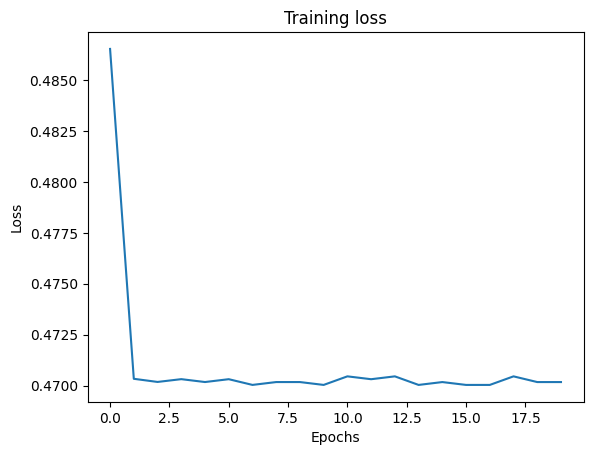

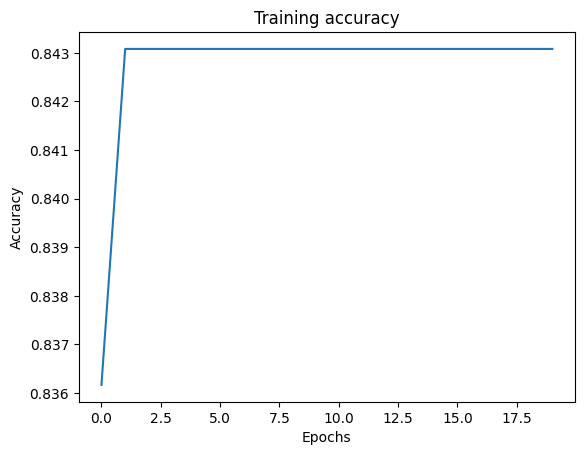

In [120]:
import matplotlib.pyplot as plt

train_losses = []
train_accs = []

model.train()
for epoch in range(20):
    epoch_loss = 0.0
    epoch_acc = 0.0
    for input_data, labels in train_dl:
        optimizer.zero_grad()

        input_data = input_data.to(device).float()
        labels = labels.to(device)

        output = model(input_data)
        labels = labels.type(torch.LongTensor)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        _, preds = torch.max(output, dim=1)
        epoch_acc += torch.sum(preds == labels).item()

    train_losses.append(epoch_loss / len(train_dl))
    train_accs.append(epoch_acc / len(train_dl.dataset))
    print(f'Epoch {epoch + 1} | Loss {round(epoch_loss / len(train_dl), 4)} | Acc {round(epoch_acc / len(train_dl.dataset), 4)}')

# Plot the loss data
plt.plot(train_losses)
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot the accuracy data
plt.plot(train_accs)
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [121]:
from sklearn.metrics import precision_score, recall_score, f1_score

model.eval()
total_correct = 0
total_samples = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for test_data, test_labels in test_dl:
        test_outputs = model(test_data)
        _, predicted = torch.max(test_outputs, 1)
        total_correct += (predicted == test_labels).sum().item()
        total_samples += test_labels.size(0)
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(test_labels.cpu().numpy())

accuracy = total_correct / total_samples
print(f'Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(all_labels, all_predicted, average='binary')
recall = recall_score(all_labels, all_predicted, average='binary')
f1 = f1_score(all_labels, all_predicted, average='binary')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(confusion_matrix(all_labels,all_predicted))

Accuracy: 82.95%
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




```
# This is formatted as code
```

 PERCEPTRON CLASSIFICATION WITH ROAD USERS 10---> Pedal cyclist

Epoch 1/20
322/322 [==============================] - 4s 7ms/step - loss: 0.4337 - accuracy: 0.9053 - val_loss: 0.2527 - val_accuracy: 0.9245
Epoch 2/20
322/322 [==============================] - 1s 2ms/step - loss: 0.2373 - accuracy: 0.9201 - val_loss: 0.2149 - val_accuracy: 0.9245
Epoch 3/20
322/322 [==============================] - 1s 2ms/step - loss: 0.2297 - accuracy: 0.9189 - val_loss: 0.2183 - val_accuracy: 0.9259
Epoch 4/20
322/322 [==============================] - 1s 4ms/step - loss: 0.2274 - accuracy: 0.9195 - val_loss: 0.2159 - val_accuracy: 0.9259
Epoch 5/20
322/322 [==============================] - 1s 2ms/step - loss: 0.2277 - accuracy: 0.9190 - val_loss: 0.2193 - val_accuracy: 0.9242
Epoch 6/20
322/322 [==============================] - 1s 2ms/step - loss: 0.2284 - accuracy: 0.9188 - val_loss: 0.2125 - val_accuracy: 0.9235
Epoch 7/20
322/322 [==============================] - 1s 2ms/step - loss: 0.2268 - accuracy: 0.9193 - val_loss: 0.2113 - val_accuracy: 0.9252
Epoch 

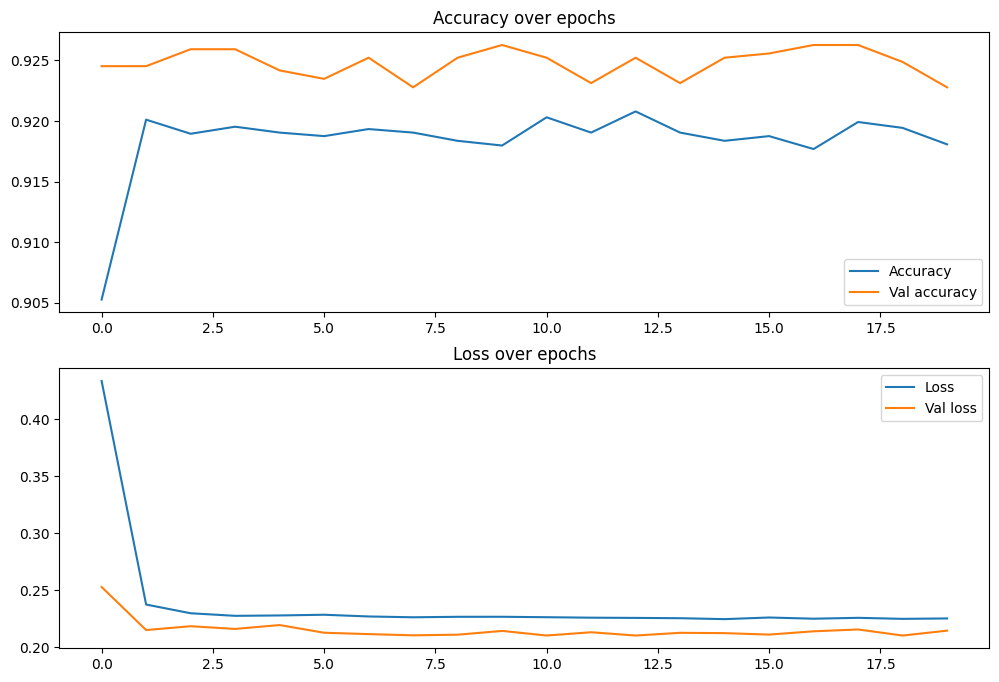

In [124]:
filtered_data = data[data['Road user'] == 10]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']]
y = (filtered_data['Bed days'] > 30).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=3))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

accuracy = history.history['accuracy']
loss = history.history['loss']

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend()
plt.title('Accuracy over epochs')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.title('Loss over epochs')

plt.show()

In [127]:
predictions = model.predict(X_test)

binary_predictions = (predictions > 0.5).astype(int)

precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
acc = accuracy_score(y_test, binary_predictions)



print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'accuray:{acc}')
confusion_matrix(binary_predictions,y_test)

90/90 [==============================] - 0s 4ms/step
Precision: 0.7411764705882353
Recall: 0.5494186046511628
F1 Score: 0.6310517529215359
accuray:0.9227812718378756


array([[2452,  155],
       [  66,  189]])

CNN CLASSIFICATION WITH ROAD USERS 10---> Pedal cyclist

In [128]:
filtered_data = data[data['Road user'] == 10]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']].values
y = (filtered_data['Bed days'] > 30).astype(int).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)


In [129]:
X_val = torch.Tensor(X_val)
y_val = torch.Tensor(y_val)

X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

val_data = SimpleData(X_val, y_val)
train_data = SimpleData(X_train, y_train)
test_data = SimpleData(X_test, y_test)

train_dl = DataLoader(train_data, batch_size=32, shuffle=True)
test_dl = DataLoader(test_data, batch_size=32, shuffle=True)
val_dl = DataLoader(val_data, batch_size=32, shuffle=True)


In [130]:
n_features = X_train.shape[1]
num_classes = 2

model = CNNModel(n_features, num_classes)
model

CNNModel(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,))
  (relu): ReLU()
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)

In [131]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

Epoch 1 | Loss 0.459 | Acc 0.8729
Epoch 2 | Loss 0.4401 | Acc 0.8731
Epoch 3 | Loss 0.4401 | Acc 0.8731
Epoch 4 | Loss 0.4401 | Acc 0.8731
Epoch 5 | Loss 0.4401 | Acc 0.8731
Epoch 6 | Loss 0.4401 | Acc 0.8731
Epoch 7 | Loss 0.4401 | Acc 0.8731
Epoch 8 | Loss 0.4401 | Acc 0.8731
Epoch 9 | Loss 0.4401 | Acc 0.8731
Epoch 10 | Loss 0.4401 | Acc 0.8731
Epoch 11 | Loss 0.4401 | Acc 0.8731
Epoch 12 | Loss 0.4401 | Acc 0.8731
Epoch 13 | Loss 0.4401 | Acc 0.8731
Epoch 14 | Loss 0.4401 | Acc 0.8731
Epoch 15 | Loss 0.4401 | Acc 0.8731
Epoch 16 | Loss 0.4401 | Acc 0.8731
Epoch 17 | Loss 0.4401 | Acc 0.8731
Epoch 18 | Loss 0.4402 | Acc 0.8731
Epoch 19 | Loss 0.4401 | Acc 0.8731
Epoch 20 | Loss 0.4401 | Acc 0.8731


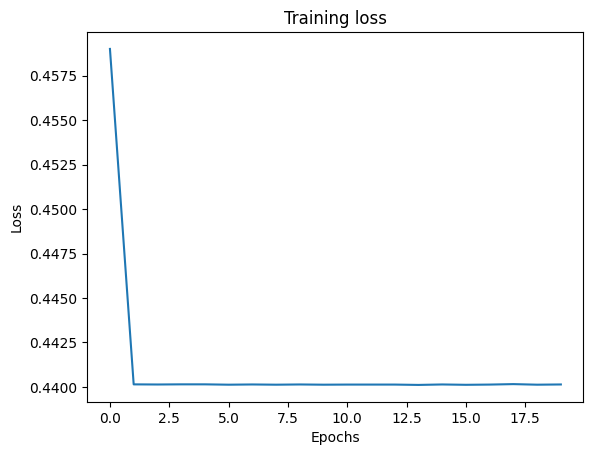

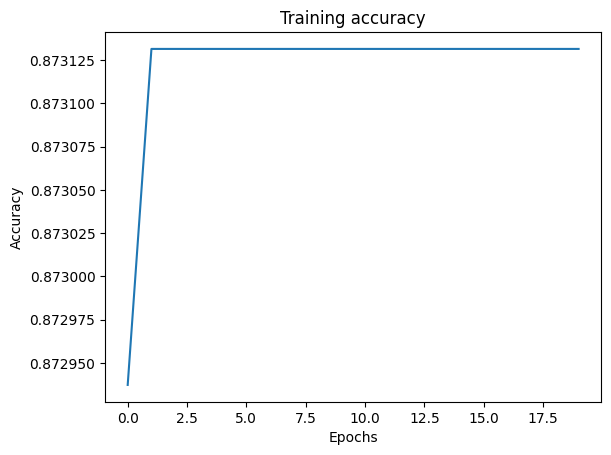

In [132]:
import matplotlib.pyplot as plt

train_losses = []
train_accs = []

model.train()
for epoch in range(20):
    epoch_loss = 0.0
    epoch_acc = 0.0
    for input_data, labels in train_dl:
        optimizer.zero_grad()

        input_data = input_data.to(device).float()
        labels = labels.to(device)

        output = model(input_data)
        labels = labels.type(torch.LongTensor)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        _, preds = torch.max(output, dim=1)
        epoch_acc += torch.sum(preds == labels).item()

    train_losses.append(epoch_loss / len(train_dl))
    train_accs.append(epoch_acc / len(train_dl.dataset))
    print(f'Epoch {epoch + 1} | Loss {round(epoch_loss / len(train_dl), 4)} | Acc {round(epoch_acc / len(train_dl.dataset), 4)}')

# Plot the loss data
plt.plot(train_losses)
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot the accuracy data
plt.plot(train_accs)
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [133]:
from sklearn.metrics import precision_score, recall_score, f1_score

model.eval()
total_correct = 0
total_samples = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for test_data, test_labels in test_dl:
        test_outputs = model(test_data)
        _, predicted = torch.max(test_outputs, 1)
        total_correct += (predicted == test_labels).sum().item()
        total_samples += test_labels.size(0)
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(test_labels.cpu().numpy())

accuracy = total_correct / total_samples
print(f'Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(all_labels, all_predicted, average='binary')
recall = recall_score(all_labels, all_predicted, average='binary')
f1 = f1_score(all_labels, all_predicted, average='binary')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(confusion_matrix(all_labels,all_predicted))

Accuracy: 87.98%
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
[[2518    0]
 [ 344    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PERCEPTRON CLASSIFICATION WITH ROAD USERS 7---> Motorcyclist

Epoch 1/20
315/315 [==============================] - 2s 3ms/step - loss: 0.4654 - accuracy: 0.8451 - val_loss: 0.3385 - val_accuracy: 0.8726
Epoch 2/20
315/315 [==============================] - 1s 2ms/step - loss: 0.3241 - accuracy: 0.8753 - val_loss: 0.3200 - val_accuracy: 0.8737
Epoch 3/20
315/315 [==============================] - 1s 2ms/step - loss: 0.3184 - accuracy: 0.8752 - val_loss: 0.3224 - val_accuracy: 0.8737
Epoch 4/20
315/315 [==============================] - 1s 2ms/step - loss: 0.3174 - accuracy: 0.8763 - val_loss: 0.3176 - val_accuracy: 0.8730
Epoch 5/20
315/315 [==============================] - 1s 2ms/step - loss: 0.3182 - accuracy: 0.8756 - val_loss: 0.3186 - val_accuracy: 0.8730
Epoch 6/20
315/315 [==============================] - 1s 2ms/step - loss: 0.3175 - accuracy: 0.8757 - val_loss: 0.3166 - val_accuracy: 0.8730
Epoch 7/20
315/315 [==============================] - 1s 3ms/step - loss: 0.3162 - accuracy: 0.8770 - val_loss: 0.3182 - val_accuracy: 0.8737
Epoch 

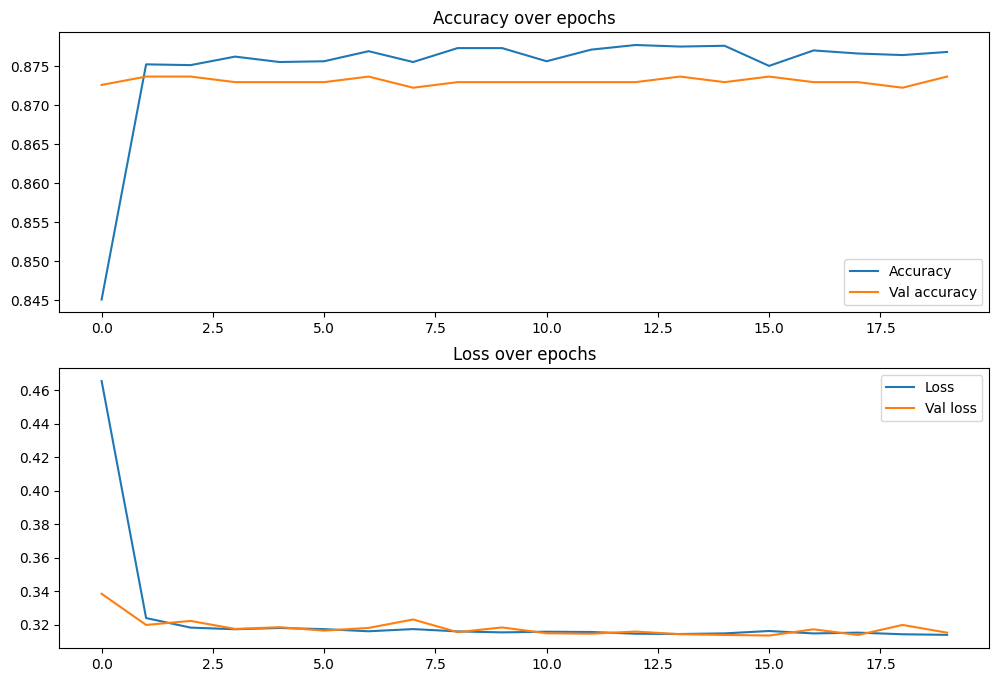

In [134]:
filtered_data = data[data['Road user'] == 7]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']]
y = (filtered_data['Bed days'] > 30).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=3))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

accuracy = history.history['accuracy']
loss = history.history['loss']

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend()
plt.title('Accuracy over epochs')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.title('Loss over epochs')

plt.show()

In [136]:
predictions = model.predict(X_test)

binary_predictions = (predictions > 0.5).astype(int)

precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
acc = accuracy_score(y_test, binary_predictions)



print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'accuray:{acc}')
confusion_matrix(binary_predictions,y_test)

88/88 [==============================] - 0s 1ms/step
Precision: 0.8307692307692308
Recall: 0.6567567567567567
F1 Score: 0.7335849056603774
accuray:0.8737030411449016


array([[1956,  254],
       [  99,  486]])

CNN WITH ROAD USERS 7---> Motorcyclist

In [21]:
filtered_data = data[data['Road user'] == 7]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']].values
y = (filtered_data['Bed days'] > 30).astype(int).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)


In [22]:
X_val = torch.Tensor(X_val)
y_val = torch.Tensor(y_val)

X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

val_data = SimpleData(X_val, y_val)
train_data = SimpleData(X_train, y_train)
test_data = SimpleData(X_test, y_test)

train_dl = DataLoader(train_data, batch_size=32, shuffle=True)
test_dl = DataLoader(test_data, batch_size=32, shuffle=True)
val_dl = DataLoader(val_data, batch_size=32, shuffle=True)


In [23]:
n_features = X_train.shape[1]
num_classes = 2

model = CNNModel(n_features, num_classes)
model

CNNModel(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,))
  (relu): ReLU()
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)

In [24]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

Epoch 1 | Loss 0.4776 | Acc 0.8606
Epoch 2 | Loss 0.4354 | Acc 0.875
Epoch 3 | Loss 0.4337 | Acc 0.8771
Epoch 4 | Loss 0.4327 | Acc 0.8769
Epoch 5 | Loss 0.4343 | Acc 0.8754
Epoch 6 | Loss 0.4333 | Acc 0.8753
Epoch 7 | Loss 0.4323 | Acc 0.8773
Epoch 8 | Loss 0.433 | Acc 0.8764
Epoch 9 | Loss 0.4342 | Acc 0.8745
Epoch 10 | Loss 0.4323 | Acc 0.8755
Epoch 11 | Loss 0.4318 | Acc 0.8765
Epoch 12 | Loss 0.4328 | Acc 0.8773
Epoch 13 | Loss 0.433 | Acc 0.8747
Epoch 14 | Loss 0.4319 | Acc 0.8764
Epoch 15 | Loss 0.4325 | Acc 0.8751
Epoch 16 | Loss 0.4319 | Acc 0.8759
Epoch 17 | Loss 0.4314 | Acc 0.8762
Epoch 18 | Loss 0.4318 | Acc 0.8764
Epoch 19 | Loss 0.4322 | Acc 0.8758
Epoch 20 | Loss 0.432 | Acc 0.8773


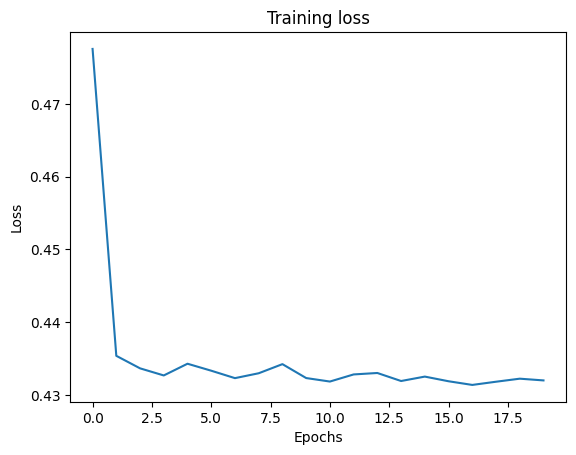

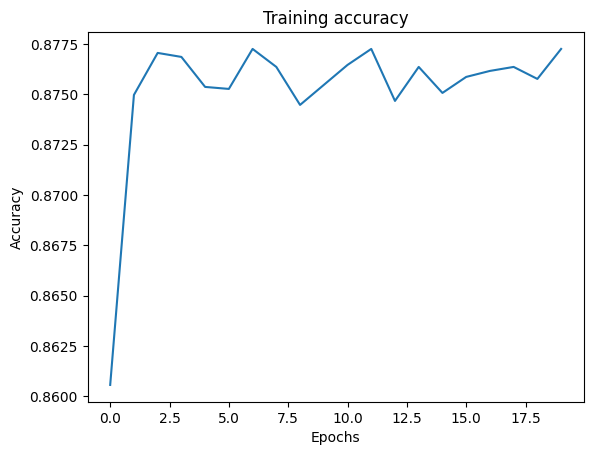

In [25]:
import matplotlib.pyplot as plt

train_losses = []
train_accs = []

model.train()
for epoch in range(20):
    epoch_loss = 0.0
    epoch_acc = 0.0
    for input_data, labels in train_dl:
        optimizer.zero_grad()

        input_data = input_data.to(device).float()
        labels = labels.to(device)

        output = model(input_data)
        labels = labels.type(torch.LongTensor)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        _, preds = torch.max(output, dim=1)
        epoch_acc += torch.sum(preds == labels).item()

    train_losses.append(epoch_loss / len(train_dl))
    train_accs.append(epoch_acc / len(train_dl.dataset))
    print(f'Epoch {epoch + 1} | Loss {round(epoch_loss / len(train_dl), 4)} | Acc {round(epoch_acc / len(train_dl.dataset), 4)}')

# Plot the loss data
plt.plot(train_losses)
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot the accuracy data
plt.plot(train_accs)
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

model.eval()
total_correct = 0
total_samples = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for test_data, test_labels in test_dl:
        test_outputs = model(test_data)
        _, predicted = torch.max(test_outputs, 1)
        total_correct += (predicted == test_labels).sum().item()
        total_samples += test_labels.size(0)
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(test_labels.cpu().numpy())

accuracy = total_correct / total_samples
print(f'Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(all_labels, all_predicted, average='binary')
recall = recall_score(all_labels, all_predicted, average='binary')
f1 = f1_score(all_labels, all_predicted, average='binary')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(confusion_matrix(all_labels,all_predicted))

Accuracy: 87.37%
Precision: 0.8319
Recall: 0.6554
F1-score: 0.7332
[[1957   98]
 [ 255  485]]


PERCEPTRON CLASSIFICATION WITH ROAD USERS 11 ===> Pedestrian

Epoch 1/20
166/166 [==============================] - 1s 3ms/step - loss: 0.5579 - accuracy: 0.8209 - val_loss: 0.4381 - val_accuracy: 0.8570
Epoch 2/20
166/166 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.8554 - val_loss: 0.3721 - val_accuracy: 0.8570
Epoch 3/20
166/166 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.8533 - val_loss: 0.3612 - val_accuracy: 0.8570
Epoch 4/20
166/166 [==============================] - 0s 2ms/step - loss: 0.3681 - accuracy: 0.8539 - val_loss: 0.3605 - val_accuracy: 0.8550
Epoch 5/20
166/166 [==============================] - 0s 2ms/step - loss: 0.3695 - accuracy: 0.8545 - val_loss: 0.3600 - val_accuracy: 0.8570
Epoch 6/20
166/166 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8556 - val_loss: 0.3605 - val_accuracy: 0.8577
Epoch 7/20
166/166 [==============================] - 0s 3ms/step - loss: 0.3688 - accuracy: 0.8537 - val_loss: 0.3598 - val_accuracy: 0.8570
Epoch 

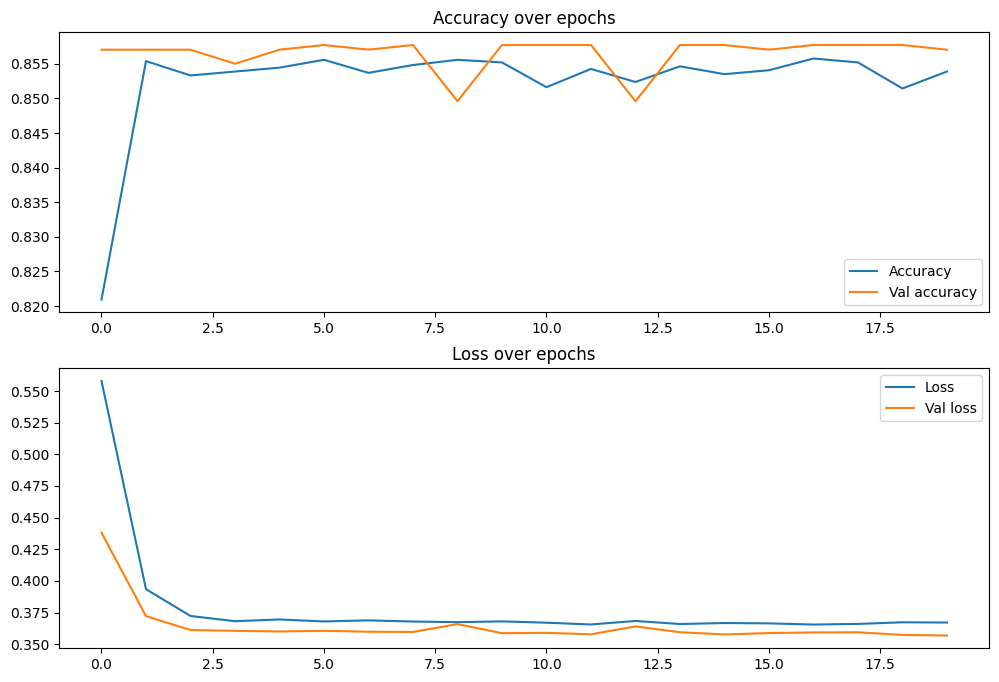

In [143]:
filtered_data = data[data['Road user'] == 11]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']]
y = (filtered_data['Bed days'] > 30).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=3))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

accuracy = history.history['accuracy']
loss = history.history['loss']

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend()
plt.title('Accuracy over epochs')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.title('Loss over epochs')

plt.show()

In [145]:
predictions = model.predict(X_test)

binary_predictions = (predictions > 0.5).astype(int)

precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
acc = accuracy_score(y_test, binary_predictions)



print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'accuray:{acc}')
confusion_matrix(binary_predictions,y_test)

47/47 [==============================] - 0s 1ms/step
Precision: 0.8051948051948052
Recall: 0.6215538847117794
F1 Score: 0.7015558698727016
accuray:0.8570460704607046


array([[1017,  151],
       [  60,  248]])

CNN CLASSIFICATION WITH ROAD USERS 11 ===> Pedestrian

In [15]:
filtered_data = data[data['Road user'] == 11]
X = filtered_data[['Count of cases', 'Died_cases', 'Hospitalisations']].values
y = (filtered_data['Bed days'] > 30).astype(int).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)


In [16]:
X_val = torch.Tensor(X_val)
y_val = torch.Tensor(y_val)

X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

val_data = SimpleData(X_val, y_val)
train_data = SimpleData(X_train, y_train)
test_data = SimpleData(X_test, y_test)

train_dl = DataLoader(train_data, batch_size=32, shuffle=True)
test_dl = DataLoader(test_data, batch_size=32, shuffle=True)
val_dl = DataLoader(val_data, batch_size=32, shuffle=True)


In [17]:
n_features = X_train.shape[1]
num_classes = 2

model = CNNModel(n_features, num_classes)
model

CNNModel(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,))
  (relu): ReLU()
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)

In [18]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

Epoch 1 | Loss 0.5089 | Acc 0.8433
Epoch 2 | Loss 0.4561 | Acc 0.8548
Epoch 3 | Loss 0.4539 | Acc 0.856
Epoch 4 | Loss 0.454 | Acc 0.8567
Epoch 5 | Loss 0.4554 | Acc 0.8531
Epoch 6 | Loss 0.4538 | Acc 0.8545
Epoch 7 | Loss 0.4538 | Acc 0.8567
Epoch 8 | Loss 0.457 | Acc 0.8501
Epoch 9 | Loss 0.4548 | Acc 0.8531
Epoch 10 | Loss 0.4536 | Acc 0.8545
Epoch 11 | Loss 0.4536 | Acc 0.8545
Epoch 12 | Loss 0.4539 | Acc 0.8548
Epoch 13 | Loss 0.4541 | Acc 0.8539
Epoch 14 | Loss 0.4543 | Acc 0.8539
Epoch 15 | Loss 0.4533 | Acc 0.8546
Epoch 16 | Loss 0.4534 | Acc 0.855
Epoch 17 | Loss 0.4563 | Acc 0.8505
Epoch 18 | Loss 0.4541 | Acc 0.8539
Epoch 19 | Loss 0.453 | Acc 0.8552
Epoch 20 | Loss 0.4532 | Acc 0.855


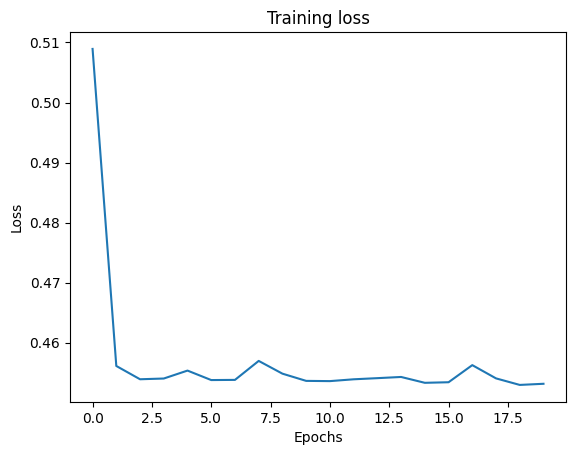

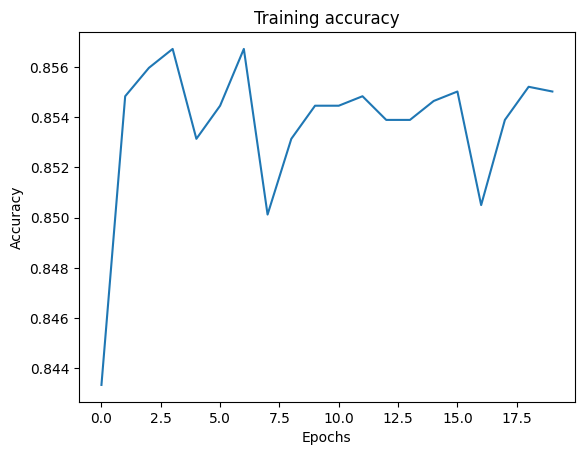

In [19]:
import matplotlib.pyplot as plt

train_losses = []
train_accs = []

model.train()
for epoch in range(20):
    epoch_loss = 0.0
    epoch_acc = 0.0
    for input_data, labels in train_dl:
        optimizer.zero_grad()

        input_data = input_data.to(device).float()
        labels = labels.to(device)

        output = model(input_data)
        labels = labels.type(torch.LongTensor)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        _, preds = torch.max(output, dim=1)
        epoch_acc += torch.sum(preds == labels).item()

    train_losses.append(epoch_loss / len(train_dl))
    train_accs.append(epoch_acc / len(train_dl.dataset))
    print(f'Epoch {epoch + 1} | Loss {round(epoch_loss / len(train_dl), 4)} | Acc {round(epoch_acc / len(train_dl.dataset), 4)}')

# Plot the loss data
plt.plot(train_losses)
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot the accuracy data
plt.plot(train_accs)
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

model.eval()
total_correct = 0
total_samples = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for test_data, test_labels in test_dl:
        test_outputs = model(test_data)
        _, predicted = torch.max(test_outputs, 1)
        total_correct += (predicted == test_labels).sum().item()
        total_samples += test_labels.size(0)
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(test_labels.cpu().numpy())

accuracy = total_correct / total_samples
print(f'Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(all_labels, all_predicted, average='binary')
recall = recall_score(all_labels, all_predicted, average='binary')
f1 = f1_score(all_labels, all_predicted, average='binary')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(confusion_matrix(all_labels,all_predicted))

Accuracy: 85.70%
Precision: 0.8052
Recall: 0.6216
F1-score: 0.7016
[[1017   60]
 [ 151  248]]


**describe**